In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go

# ⬇️ Downloading data

In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/StudentsPerformance.csv'
data = pd.read_csv(path)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 📊 Graphs

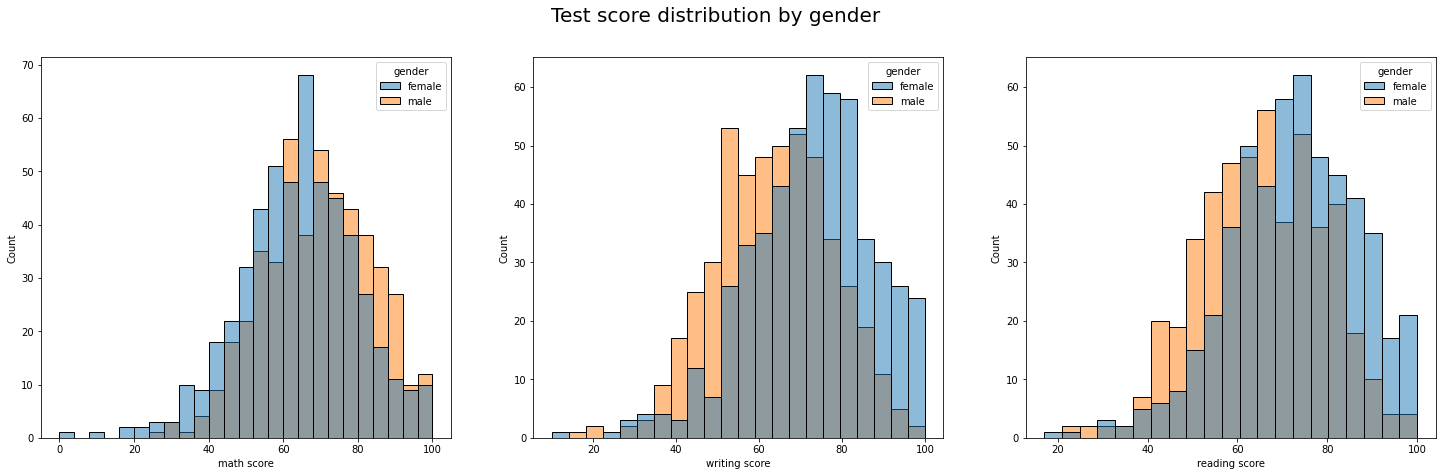

In [3]:
fig = plt.figure(figsize=(25,7))
grid = GridSpec(nrows=1, ncols=3, figure=fig)
fig.suptitle("Test score distribution by gender", fontsize=20)

axis1 = fig.add_subplot(grid[0,0])
sns.histplot(data=data, x='math score', hue='gender')

axis2 = fig.add_subplot(grid[0,1])
sns.histplot(data=data, x='writing score', hue='gender')

axis3 = fig.add_subplot(grid[0,2])
sns.histplot(data=data, x='reading score', hue='gender')

plt.show()

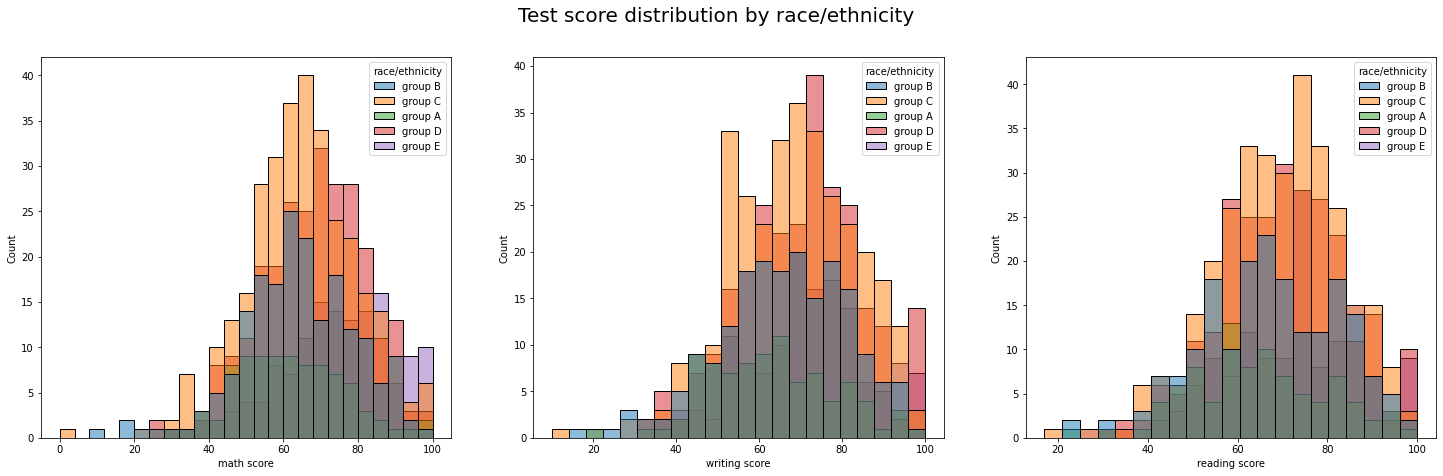

In [4]:
fig = plt.figure(figsize=(25,7))
grid = GridSpec(nrows=1, ncols=3, figure=fig)
fig.suptitle("Test score distribution by race/ethnicity", fontsize=20)

axis4 = fig.add_subplot(grid[0,0])
sns.histplot(data=data, x='math score', hue='race/ethnicity')

axis5 = fig.add_subplot(grid[0,1])
sns.histplot(data=data, x='writing score', hue='race/ethnicity')

axis6 = fig.add_subplot(grid[0,2])
sns.histplot(data=data, x='reading score', hue='race/ethnicity')

plt.show()

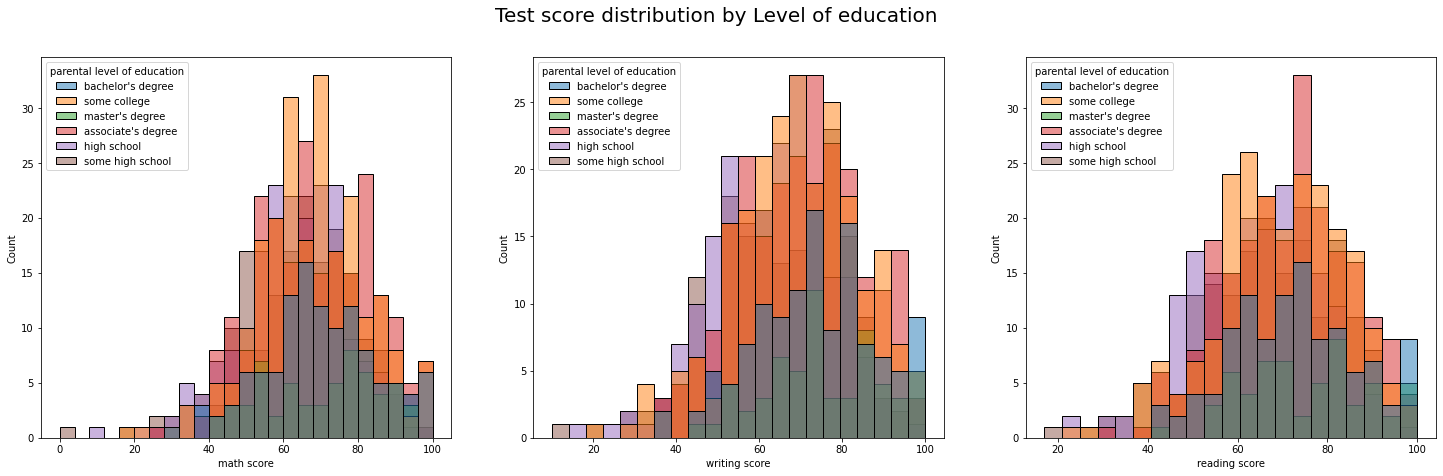

In [5]:
fig = plt.figure(figsize=(25,7))
grid = GridSpec(nrows=1, ncols=3, figure=fig)
fig.suptitle("Test score distribution by Level of education", fontsize=20)

axis7 = fig.add_subplot(grid[0,0])
sns.histplot(data=data, x='math score', hue='parental level of education')

axis9 = fig.add_subplot(grid[0,1])
sns.histplot(data=data, x='writing score', hue='parental level of education')

axis9 = fig.add_subplot(grid[0,2])
sns.histplot(data=data, x='reading score', hue='parental level of education')

plt.show()

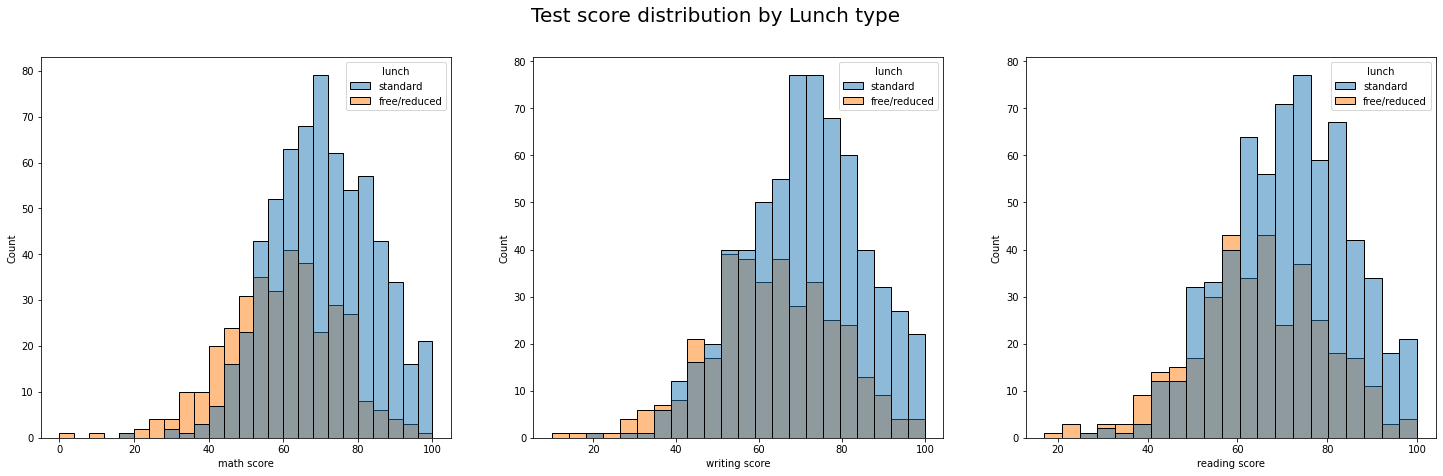

In [6]:
fig = plt.figure(figsize=(25,7))
grid = GridSpec(nrows=1, ncols=3, figure=fig)
fig.suptitle("Test score distribution by Lunch type", fontsize=20)

axis10 = fig.add_subplot(grid[0,0])
sns.histplot(data=data, x='math score', hue='lunch')

axis11 = fig.add_subplot(grid[0,1])
sns.histplot(data=data, x='writing score', hue='lunch')

axis12 = fig.add_subplot(grid[0,2])
sns.histplot(data=data, x='reading score', hue='lunch')

plt.show()

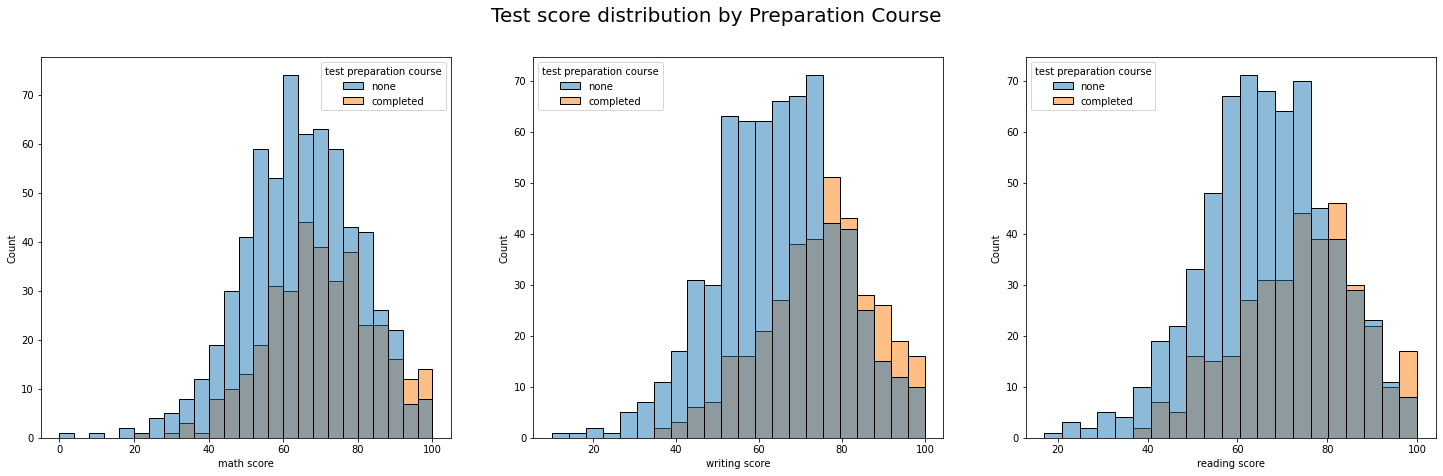

In [7]:
fig = plt.figure(figsize=(25,7))
grid = GridSpec(nrows=1, ncols=3, figure=fig)
fig.suptitle("Test score distribution by Preparation Course", fontsize=20)

axis13 = fig.add_subplot(grid[0,0])
sns.histplot(data=data, x='math score', hue='test preparation course')

axis10 = fig.add_subplot(grid[0,1])
sns.histplot(data=data, x='writing score', hue='test preparation course')

axis15 = fig.add_subplot(grid[0,2])
sns.histplot(data=data, x='reading score', hue='test preparation course')

plt.show()

# ✖️ Variables

## Defining variables


In [8]:
none = data[data['test preparation course'] == 'none']
completed = data[data['test preparation course'] == 'completed']

standard = data[data['lunch'] == 'standard']
free = data[data['lunch'] == 'free/reduced']

male = data[data['gender'] == 'male']
female = data[data['gender'] == 'female']

## Levene Test and T-Test
* Levene: The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.
</br>
</br>
* T-Test: 
  This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.
</br>
</br>
</br>
</br>

$H_0$: The two samples have identical average  ($p \geq 0.05$)
</br>
</br>

$H_a$: The two samples do not have identical average ($p < 0.05$)

* ### Course


In [9]:
stats_math_levene_course, p_value_math_levene_course = stats.levene(none['math score'], completed['math score'])

stats_reading_levene_course, p_value_reading_levene_course = stats.levene(none['reading score'], completed['reading score'])

stats_writing_levene_course, p_value_writing_levene_course = stats.levene(none['writing score'], completed['writing score'])

print("Math Score -> P-Value:", p_value_math_levene_course)

print("\nReading Score -> P-Value:", p_value_reading_levene_course)

print("\nWriting Score -> P-Value:", p_value_writing_levene_course)

Math Score -> P-Value: 0.4655125071689348

Reading Score -> P-Value: 0.29899398140058275

Writing Score -> P-Value: 0.01471666446790565


In [10]:
stats_math_course, p_value_math_course = stats.ttest_ind(a=none['math score'], b=completed['math score'], equal_var=True)

stats_reading_course, p_value_reading_course  = stats.ttest_ind(a=none['reading score'], b=completed['reading score'], equal_var=True)

stats_writing_course, p_value_writing_course  = stats.ttest_ind(a=none['writing score'], b=completed['writing score'], equal_var=False)

print("\nMath Score -> P-Value:", p_value_math_course)

print("\nReading Score -> P-Value:", p_value_reading_course)

print("\nWriting Score -> P-Value:", p_value_writing_course)



Math Score -> P-Value: 1.5359134607147415e-08

Reading Score -> P-Value: 9.081783336892205e-15

Writing Score -> P-Value: 2.662740173941066e-25


* ### Lunch

In [11]:
stats_math_levene_lunch, p_value_math_levene_lunch = stats.levene(standard['math score'], free['math score'])

stats_reading_levene_lunch, p_value_reading_levene_lunch = stats.levene(standard['reading score'], free['reading score'])

stats_writing_levene_lunch, p_value_writing_levene_lunch = stats.levene(standard['writing score'], free['writing score'])

print("Math Score -> P-Value:", p_value_math_levene_lunch)

print("\nReading Score -> P-Value:", p_value_reading_levene_lunch)

print("\nWriting Score -> P-Value:", p_value_writing_levene_lunch)

Math Score -> P-Value: 0.07422200559323446

Reading Score -> P-Value: 0.15802714880749977

Writing Score -> P-Value: 0.10508577823641975


In [12]:
stats_math_lunch, p_value_math_lunch = stats.ttest_ind(a=standard['math score'], b=free['math score'], equal_var=True)

stats_reading_lunch, p_value_reading_lunch  = stats.ttest_ind(a=standard['reading score'], b=free['reading score'], equal_var=True)

stats_writing_lunch, p_value_writing_lunch  = stats.ttest_ind(a=standard['writing score'], b=free['writing score'], equal_var=True)

print("Math Score -> P-Value:", p_value_math_lunch)

print("\nReading Score -> P-Value:", p_value_reading_lunch)

print("\nWriting Score -> P-Value:", p_value_writing_lunch)

Math Score -> P-Value: 2.4131955993137074e-30

Reading Score -> P-Value: 2.0027966545279011e-13

Writing Score -> P-Value: 3.1861895831664765e-15


* ### Gender

In [13]:
stats_math_levene_gender, p_value_math_levene_gender = stats.levene(male['math score'], female['math score'])

stats_reading_levene_gender, p_value_reading_levene_gender = stats.levene(male['reading score'], female['reading score'])

stats_writing_levene_gender, p_value_writing_levene_gender = stats.levene(male['writing score'], female['writing score'])

print("Math Score -> P-Value:", p_value_math_levene_gender)

print("\nReading Score -> P-Value:", p_value_reading_levene_gender)

print("\nWriting Score -> P-Value:", p_value_writing_levene_gender)

Math Score -> P-Value: 0.55630915751998

Reading Score -> P-Value: 0.8910815766839298

Writing Score -> P-Value: 0.93362725100168


In [14]:
stats_math_gender, p_value_math_gender = stats.ttest_ind(a=male['math score'], b=female['math score'], equal_var=True)

stats_reading_gender, p_value_reading_gender  = stats.ttest_ind(a=male['reading score'], b=female['reading score'], equal_var=True)

stats_writing_gender, p_value_writing_gender  = stats.ttest_ind(a=male['writing score'], b=female['writing score'], equal_var=True)

print("Math Score -> P-Value:", p_value_math_gender)

print("\nReading Score -> P-Value:", p_value_reading_gender)

print("\nWriting Score -> P-Value:", p_value_writing_gender)

Math Score -> P-Value: 9.120185549328822e-08

Reading Score -> P-Value: 4.680538743933289e-15

Writing Score -> P-Value: 2.019877706867934e-22


## Comparison

In [15]:


fig = go.Figure(data=[go.Table(
    header=dict(values=['Variable', 'Levene Test Math Score','T-Test Math Score','Levene Test Reading Score','T-Test Reading Score', 'Levene Test Writing Score','T-Test Writing Score'],
                line_color='black',
                fill_color='cornflowerblue',
                align='center',
                font=dict(color='black', size=14)),
    cells=dict(values=[['Gender', 'Lunch', 'Course'], # 1st column
                       [round(p_value_math_levene_gender, 4), round(p_value_math_levene_lunch, 4), round(p_value_math_levene_course, 4)],
                       [p_value_math_gender, p_value_math_lunch, p_value_math_course], 
                       [round(p_value_reading_levene_gender, 4), round(p_value_reading_levene_lunch, 4), round(p_value_reading_levene_course, 4)],
                       [p_value_reading_gender, p_value_reading_lunch, p_value_reading_course],
                       [round(p_value_writing_levene_gender, 4),round(p_value_writing_levene_lunch, 4), round(p_value_writing_levene_course, 4)],
                       [p_value_writing_gender, p_value_writing_lunch, p_value_writing_course]], # 2nd column
               line_color='black',
               fill_color='lightskyblue',
               align='center'))
])

fig.update_layout(width=1750, height=300)
fig.show()

# 💾 Data preparation

## One Hot Encoding

In [17]:
genderTypes = {'gender': {'female': 0, 'male': 1}}

courseTypes = {'test preparation course': {'none': 0, 'completed': 1}}

lunchTypes = {'lunch': {'free/reduced': 0, 'standard': 1}}

data = data.replace(genderTypes)

data = data.replace(courseTypes)

data = data.replace(lunchTypes)

In [18]:
data = pd.get_dummies(data, columns=['race/ethnicity', 'parental level of education'], prefix=['race', 'education'])

In [19]:
data.drop(['race_group E', 'education_some high school'], axis=1, inplace=True)

In [20]:
data.head()

,gender,lunch,test preparation course,math score,reading score,writing score,race_group A,race_group B,race_group C,race_group D,education_associate's degree,education_bachelor's degree,education_high school,education_master's degree,education_some college
0,0,1,0,72,72,74,0,1,0,0,0,1,0,0,0
1,0,1,1,69,90,88,0,0,1,0,0,0,0,0,1
2,0,1,0,90,95,93,0,1,0,0,0,0,0,1,0
3,1,0,0,47,57,44,1,0,0,0,1,0,0,0,0
4,1,1,0,76,78,75,0,0,1,0,0,0,0,0,1


## Test split

In [21]:
x_with_all_variables = data.drop('math score', axis=1)
y_with_all_variables = data['math score']

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(x_with_all_variables, y_with_all_variables, random_state=40)

x_using_less_variables = data[['gender', 'lunch', 'test preparation course', 'reading score']]
y_using_less_variables = data['math score']

X_train, X_test, y_train, y_test = train_test_split(x_using_less_variables, y_using_less_variables, random_state=40)

# 📁 Model Section

In [22]:
model_all_variables = LinearRegression()
model_all_variables.fit(X_train_all, y_train_all)
pred_all_variables = model_all_variables.predict(X_test_all)

model_less_variables = LinearRegression()
model_less_variables.fit(X_train, y_train)
pred_less_variables = model_less_variables.predict(X_test)


## Prediction

In [23]:
pd.DataFrame({"Real": y_test, 'Predict With All Variables': pred_all_variables, 'Predict With Less Variables': pred_less_variables})

,Real,Predict With All Variables,Predict With Less Variables
204,59,48.420251,47.568734
71,63,63.778220,59.463650
594,92,86.814629,90.121432
672,69,69.552638,70.682776
14,50,47.476616,47.108589
...,...,...,...
199,78,66.462871,67.399882
383,38,42.264789,39.110858
764,60,66.748419,68.314018
197,55,60.883471,57.487384


We can confirm that we dont need to use 14 columns to predict